# Image calculations with FFTs and operations

We start by preparing the environment. We will use NumPy, Matplotlib, and Scikit-Image for the different manipulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
import skimage.util as util
# from skimage.color import rgb2gray

## Reading images and doing FFTs

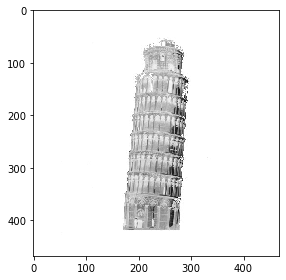

In [63]:
pisa_tower = imread('PisaTower-Image-Presentation.png', as_gray=True)
imshow(pisa_tower)

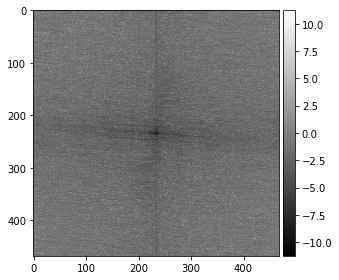

In [64]:
pisa_tower_fft = np.fft.fftshift(np.fft.fft2(pisa_tower))
imshow(util.invert(np.log(np.abs(pisa_tower_fft))), cmap='gray')

In [65]:
imsave('pisa-tower-fft.png', util.invert(np.log(np.abs(pisa_tower_fft))))

Lossy conversion from float64 to uint8. Range [-11.245096846163465, 5.117719973992778]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
president = imread('Obama-Image-Presentation.png', as_gray=True)
chancellor = imread('Merkel-Image-Presentation.png', as_gray=True)

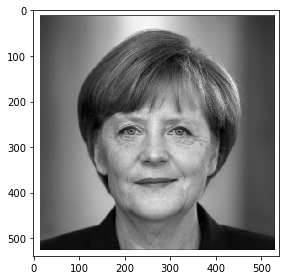

In [6]:
imshow(chancellor)

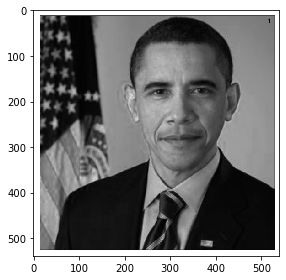

In [7]:
imshow(president)

# Mixing Amplitude and Phase

We will demonstrate what happens if we mix the phase of one image with the amplitude from another. First, we calculate amplitude and phase for both images, from their Fourier transform.

In [8]:
chancellor_fft = np.fft.fftshift(np.fft.fft2(chancellor))
president_fft = np.fft.fftshift(np.fft.fft2(president))
chancellor_amp = np.abs(chancellor_fft)
chancellor_phase = np.angle(chancellor_fft)
president_amp = np.abs(president_fft)
president_phase = np.angle(president_fft)


Second, we mix the amplitude of the President image with the phase of the Chancellor image. You can see that the Chancellor is recognisable from its phase, and distorted by the President's amplitude.

/Users/j.santander-vela/opt/anaconda3/envs/fft-images/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


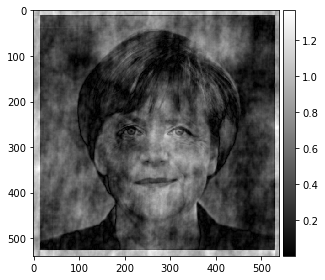

In [9]:
recovered_chancellor = np.fft.ifft2(
    np.fft.fftshift(president_amp*np.exp(1j*chancellor_phase))
)
imshow(np.abs(recovered_chancellor), cmap='gray')


In [16]:
imsave('chancellor-phase-president-amp.png', np.abs(recovered_chancellor))

Lossy conversion from float64 to uint8. Range [2.0249228802665616e-06, 1.3670725023556645]. Convert image to uint8 prior to saving to suppress this warning.


Third and last, we mix the amplitude of the Chancellor image with the phase of the President image. You can see that now the President is recognisable from its phase, and distorted by the Chancellor's amplitude.

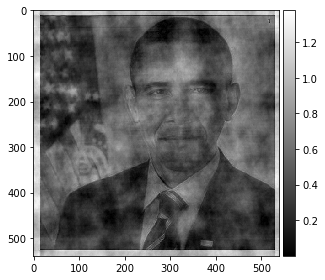

In [10]:
recovered_president = np.fft.ifft2(
    np.fft.fftshift(chancellor_amp*np.exp(1j*president_phase))
)
imshow(np.abs(recovered_president), cmap='gray')


In [17]:
imsave('president-phase-chancellor-amp.png', np.abs(recovered_president))

Lossy conversion from float64 to uint8. Range [5.1815127817884665e-06, 1.3792328162824374]. Convert image to uint8 prior to saving to suppress this warning.


## Demonstrating that the inverse FFT recovers the original image

Here we demonstrate it with Chancellor Merkel

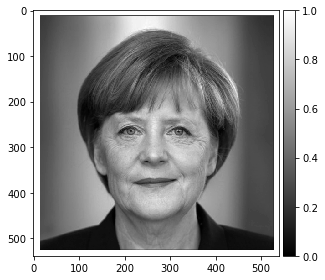

In [11]:
chancellor_ifft = np.fft.ifft2(np.fft.fftshift(chancellor_fft))
imshow(np.abs(chancellor_ifft), cmap='gray')

# Other FFT Examples

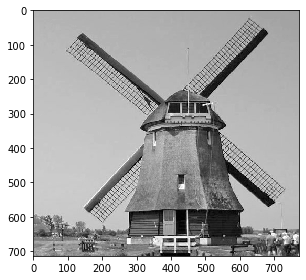

In [20]:
dutch_mill = imread('DutchMill-Image-Presentation.jpeg', as_gray=True)
imshow(dutch_mill, cmap='gray')

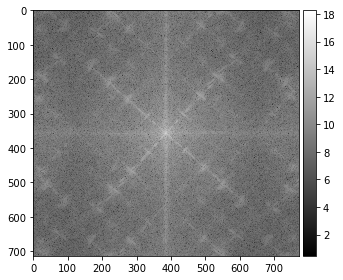

In [21]:
dutch_mill_fft = np.fft.fftshift(np.fft.fft2(dutch_mill))
imshow(np.log(np.abs(dutch_mill_fft)), cmap='gray')

In [23]:
imsave('scaled-mill-fft.png',np.log(np.abs(dutch_mill_fft)))

Lossy conversion from float64 to uint8. Range [0.46203744810733743, 18.27376305619005]. Convert image to uint8 prior to saving to suppress this warning.


Let's show that we can recover partially the mill if we fix the amplitude to one:

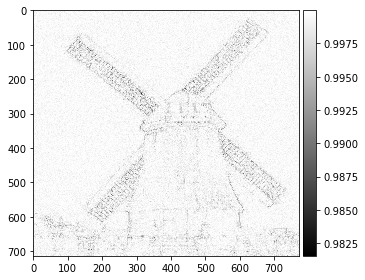

In [46]:
unit_amp_dutch_mill_fft = 1*np.exp(1j*np.angle(dutch_mill_fft))
recovered_dutch_mill = np.fft.ifft2(
    np.fft.fftshift(unit_amp_dutch_mill_fft)
)
inverted_recovered_unit_amp_dutch_mill = util.invert(np.abs(recovered_dutch_mill))
imshow(inverted_recovered_unit_amp_dutch_mill, cmap='gray')


We need to define a normalisation function before we can save the image, becase the dynamic range is small.

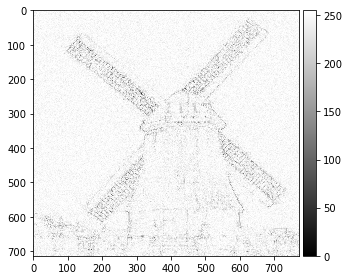

In [66]:
def normalise(vector, scale_min=0, scale_max=255):
    array_min, array_max = np.min(vector), np.max(vector)
    array_range = array_max-array_min
    return ((vector-array_min)/array_range*(scale_max-scale_min)+scale_min)

imshow(normalise(inverted_recovered_unit_amp_dutch_mill), cmap='gray')

In [50]:
imsave('dutch-mill-unit-amp.png', normalise(inverted_recovered_unit_amp_dutch_mill))

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


And this is the result preserving the amplitude, but zeroing the phase:

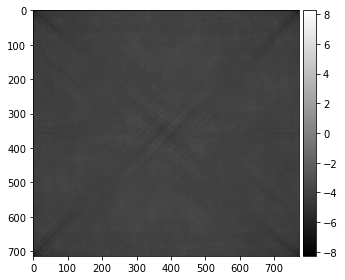

In [86]:
zero_phase_dutch_mill_fft = np.abs(dutch_mill_fft)+0j
recovered_dutch_mill_zero_phase = np.fft.ifft2(
    np.fft.fftshift(zero_phase_dutch_mill_fft)
)
inverted_recovered_zero_phase_mill_log = util.invert(np.log(np.abs(recovered_dutch_mill_zero_phase)))
imshow(inverted_recovered_zero_phase_mill_log,cmap='gray')

In [87]:
imsave('zero-phase-recovered-dutch-mill.png', inverted_recovered_zero_phase_mill_log)

Lossy conversion from float64 to uint8. Range [-8.2590427789213, -3.1142862888208196]. Convert image to uint8 prior to saving to suppress this warning.
